# Data Challenge - MDI 343

In [0]:
%matplotlib inline
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import time

from sklearn.ensemble import GradientBoostingClassifier
from scipy import stats
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
import operator

import pandas as pd
import seaborn as sns

import lightgbm as lgb

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Fayyaz

In [0]:
xtrain = pd.read_csv('/content/drive/My Drive/Colab Notebooks/xtrain_challenge.csv')
ytrain = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ytrain_challenge.csv')
xtest = pd.read_csv('/content/drive/My Drive/Colab Notebooks/xtest_challenge.csv')

# <span style="color:red"> test de 's4' sur la plateforme: 0.75

In [0]:
predictors = [x for x in xtrain.columns if x not in ['s6','s10','qr4','qr6','qs9','qs10']]

nrows = xtrain.shape[0]
chosen_idx = np.random.choice(nrows, replace = False, size = 1000000)
X = xtrain[predictors].iloc[chosen_idx]#.to_numpy()
y = ytrain.iloc[chosen_idx]#.to_numpy()

In [0]:
clf_xgb = XGBClassifier(objective = 'binary:logistic')
#param_dist = {'n_estimators': stats.randint(150, 500),
#              'learning_rate': stats.uniform(0.01, 0.07),
#              'subsample': stats.uniform(0.3, 0.7),
#              'max_depth': [3, 4, 5, 6, 7, 8, 9],
#              'colsample_bytree': stats.uniform(0.5, 0.45),
#              'min_child_weight': [1, 2, 3]
#             }

              
parameters = {'max_depth':[3, 4, 5, 6, 7, 8] ,'learning_rate':[0.01, 0.02, 0.03, 0.3],'min_child_weight': [1, 2, 3]}

clf = GridSearchCV(estimator=clf_xgb, param_grid= parameters,cv=KFold(n_splits=10),scoring = 'roc_auc')
clf.fit(X,y.values.ravel())#values.ravel()

In [0]:
ytest = clf.predict_proba(xtest[predictors])[:,clf.classes_ == 1][:,0]
print(ytest.shape)
np.savetxt('/content/drive/My Drive/Colab Notebooks/ytest_challenge_Fayyaz_xgboost5M.csv', ytest, fmt = '%1.15f', delimiter=',')

**Recréation d'un Train**

In [0]:
from sklearn import preprocessing

In [0]:
scores = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11']
scaler = preprocessing.StandardScaler()
xtrain_s = scaler.fit_transform(xtrain[scores])
xtrain_s = pd.DataFrame(xtrain_s, columns=xtrain[scores].columns)

In [0]:
xtest_s = scaler.fit_transform(xtest[scores])
xtest_s = pd.DataFrame(xtest_s, columns=xtrain[scores].columns)

In [0]:
xtrain_np = xtrain_s.to_numpy()
xtest_np = xtest_s.to_numpy()

In [0]:
i=1
liste_indices = []
for row in range(xtest_np.shape[0] - 23386,xtest_np.shape[0],1):
    dist = np.linalg.norm(xtrain_np-xtest_np[row,:],axis=1)
    liste_indices.extend(np.argsort(dist)[:2])
    i = i+1
    if i % 1000 == 1:
        xtrain_u = pd.DataFrame(columns=xtest.columns)
        xtrain_u = xtrain.loc[liste_indices,:]
        np.savetxt('/content/drive/My Drive/Colab Notebooks/xtrain_u.csv', xtrain_u, fmt = '%1.15f', delimiter=',')
        ytrain_u = pd.DataFrame(columns=ytrain.columns)
        ytrain_u = ytrain.loc[liste_indices,:]
        np.savetxt('/content/drive/My Drive/Colab Notebooks/ytrain_u.csv', ytrain_u, fmt = '%1.15f', delimiter=',')

In [0]:
xtrain_u = pd.DataFrame(columns=xtest.columns)
xtrain_u = xtrain.loc[liste_indices,:]

In [0]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/xtrain_u.csv', xtrain_u, fmt = '%1.15f', delimiter=',')

**XGBoost sur Xtrain Uf**

In [0]:
scores = ['s1','s2','s3','s4','s5','s7','s8','s9','s11']

xtrain_uf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/xtrain_uf.csv',names = xtrain.columns)
xtrain_uf = xtrain_uf[scores]

ytrain_uf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ytrain_uf.csv',names = ytrain.columns)

In [0]:
clf_xgb = XGBClassifier(objective = 'binary:logistic')
#param_dist = {'n_estimators': stats.randint(150, 500),
#              'learning_rate': stats.uniform(0.01, 0.07),
#              'subsample': stats.uniform(0.3, 0.7),
#              'max_depth': [3, 4, 5, 6, 7, 8, 9],
#              'colsample_bytree': stats.uniform(0.5, 0.45),
#              'min_child_weight': [1, 2, 3]
#             }

              
parameters = {'max_depth':[5, 8, 10] ,'learning_rate':[0.01, 0.05, 0.07],'min_child_weight': [1, 3, 7], 'n_estimators':[150]}

clf = GridSearchCV(estimator=clf_xgb, param_grid= parameters,cv=KFold(n_splits=7),scoring = 'roc_auc')
clf.fit(xtrain_uf,ytrain_uf.values.ravel())#values.ravel()

GridSearchCV(cv=KFold(n_splits=7, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.07],
                         'max_depth': [5, 8, 10], 'm

In [0]:
ytest = clf.predict_proba(xtest)[:,clf.classes_ == 1][:,0]
print(ytest.shape)
np.savetxt('/content/drive/My Drive/Colab Notebooks/ytest_challenge_Fayyaz_unbiased2.csv', ytest, fmt = '%1.15f', delimiter=',')

(3768311,)


In [0]:
fpr, tpr, threshold = roc_curve(ytrain['y'],  clf.predict_proba(xtrain)[:,clf.classes_ == 1][:,0])
print(tpr[fpr<=0.0001][-1])

0.942439811485591


**SVM**

In [0]:
from sklearn import svm
from sklearn.kernel_approximation import (RBFSampler,Nystroem)

In [0]:
scores = ['s1','s2','s3','s4','s5','s7','s8','s9','s11']
#scores = [x for x in xtrain.columns if x not in ['s6','s10','qr4','qr6','qs9','qs10']]

xtrain_uf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/xtrain_uf.csv',names = xtrain.columns)
ytrain_uf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ytrain_uf.csv',names = ytrain.columns)

chosen_idx = np.random.choice(xtrain.shape[0], replace = False, size = 1000000)

xtrain_svm = xtrain_uf[scores] #.loc[chosen_idx,:]
ytrain_svm = ytrain_uf  #.loc[chosen_idx,:]

In [0]:
npos = ytrain_svm[ytrain_svm['y'] == 1].shape[0]
nneg = ytrain_svm[ytrain_svm['y'] == 0].shape[0]
print('nombre de positifs:', npos)
print('nombre de négatifs:', nneg)

nombre de positifs: 4955
nombre de négatifs: 116431


In [0]:
chosen_idx = np.random.choice(nneg, replace = False, size = npos)

In [0]:
x_tir_neg = xtrain_svm[ytrain_svm['y'] == 0].reset_index(drop=True).loc[chosen_idx,:]
y_tir_neg = ytrain_svm[ytrain_svm['y'] == 0].reset_index(drop=True).loc[chosen_idx,:]
x_pos = xtrain_svm[ytrain_svm['y'] == 1].reset_index(drop=True)
y_pos = ytrain_svm[ytrain_svm['y'] == 1].reset_index(drop=True)

In [0]:
x_f = pd.concat([x_tir_neg,x_pos]).reset_index(drop=True)
y_f = pd.concat([y_tir_neg,y_pos]).reset_index(drop=True)

In [0]:
reorder_idx = np.random.choice(y_f.shape[0], replace = False, size = y_f.shape[0])
x_f = x_f.loc[reorder_idx,:]
y_f = y_f.loc[reorder_idx,:]

In [0]:
clf_svm = svm.SVC(kernel='rbf') #gamma = 'scale' 

Cs = [0.001, 0.01]
gammas = [0.01, 0.1, 0.5, 1, 10]
param_grid = {'C': Cs, 'gamma': gammas}
GS_svm = GridSearchCV(clf_svm, param_grid, cv=KFold(n_splits=5))
GS_svm.fit(x_f, y_f['y'])

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01], 'gamma': [0.01, 0.1, 0.5, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
fpr, tpr, threshold = roc_curve(ytrain['y'],  GS_svm.decision_function(xtrain[scores]))
print(tpr[fpr<=0.0001][-1])

0.00696528648603674


In [0]:
ytest = GS_svm.decision_function(xtest[scores])[:,0]
print(ytest.shape)
np.savetxt('/content/drive/My Drive/Colab Notebooks/ytest_challenge_Fayyaz_svm_gc_uf.csv', ytest, fmt = '%1.15f', delimiter=',')

(3768311,)


**OSVM**

In [0]:
from sklearn.svm import OneClassSVM

In [0]:
scores = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11']
ytrain[ytrain['y'] == 1].shape[0]/ytrain[ytrain['y'] == 0].shape[0]

0.07373762018549988

In [0]:
clf_osvm = OneClassSVM(nu=0.074, kernel="rbf", gamma='scale')

In [0]:
clf_osvm.fit(xtrain[scores][ytrain['y']==1])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.074, shrinking=True, tol=0.001, verbose=False)

In [0]:
ytest = clf_osvm.decision_function(xtest[scores])
print(ytest.shape)
np.savetxt('/content/drive/My Drive/Colab Notebooks/ytest_challenge_Fayyaz_osvm.csv', ytest, fmt = '%1.15f', delimiter=',')

In [0]:
fpr, tpr, threshold = roc_curve(ytrain['y'],  clf_osvm.decision_function(xtrain[scores]))
print(tpr[fpr<=0.0001][-1])

NameError: ignored

**Feature Engineering**

In [0]:
xtrain_fe = xtrain.copy()

In [0]:
xtrain.columns

Index(['qs1', 'qs2', 'qs3', 'qs4', 'qs5', 'qs6', 'qs7', 'qs8', 'qs9', 'qs10',
       'qs11', 'qs12', 'qs13', 'qr1', 'qr2', 'qr3', 'qr4', 'qr5', 'qr6', 'qr7',
       'qr8', 'qr9', 'qr10', 'qr11', 'qr12', 'qr13', 's1', 's2', 's3', 's4',
       's5', 's6', 's7', 's8', 's9', 's10', 's11'],
      dtype='object')

In [0]:
xtrain_fe['dq2'] = abs(xtrain_fe['qs2']-xtrain_fe['qr2'])
xtrain_fe['dq3'] = abs(xtrain_fe['qs3']-xtrain_fe['qr3'])
xtrain_fe['dq4'] = abs(xtrain_fe['qs4']-xtrain_fe['qr4'])
xtrain_fe['dq5'] = abs(xtrain_fe['qs5']-xtrain_fe['qr5'])
xtrain_fe['dq6'] = abs(xtrain_fe['qs6']-xtrain_fe['qr6'])
xtrain_fe['dq7'] = abs(xtrain_fe['qs7']-xtrain_fe['qr7'])
xtrain_fe['dq8'] = abs(xtrain_fe['qs8']-xtrain_fe['qr8'])
xtrain_fe['dq9'] = abs(xtrain_fe['qs9']-xtrain_fe['qr9'])
xtrain_fe['dq10'] = abs(xtrain_fe['qs10']-xtrain_fe['qr10'])
xtrain_fe['dq11'] = abs(xtrain_fe['qs11']-xtrain_fe['qr11'])
xtrain_fe['dq12'] = abs(xtrain_fe['qs12']-xtrain_fe['qr12'])
xtrain_fe['dq13'] = abs(xtrain_fe['qs13']-xtrain_fe['qr13'])

In [0]:
xtrain_fe = xtrain_fe.drop(columns =['qs2','qr2','qs3','qr3','qs4','qr4','qs5','qr5','qs6','qr6','qs7','qr7','qs8','qr8','qs9','qr9','qs10','qr10','qs11','qr11','qs12','qr12','qs13','qr13'])

In [0]:
#xtrain_fe = xtrain_fe.drop(columns =['qs1','qr1'])

In [0]:
xtrain_fe['y'] = ytrain['y']

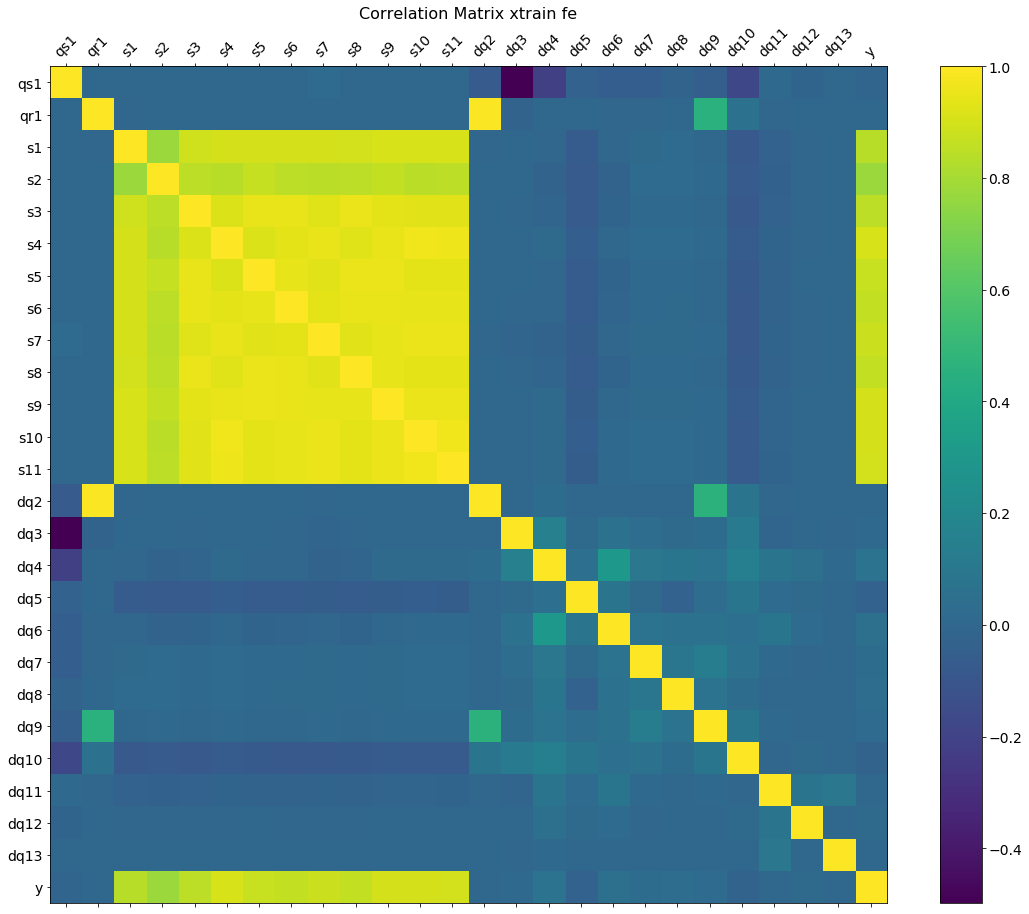

In [0]:
f = plt.figure(figsize=(19, 15))
plt.matshow(xtrain_fe.corr(), fignum=f.number)
plt.xticks(range(xtrain_fe.shape[1]), xtrain_fe.columns, fontsize=14, rotation=45)
plt.yticks(range(xtrain_fe.shape[1]), xtrain_fe.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix xtrain fe', fontsize=16);

In [0]:
xtrain_fe = xtrain_fe.drop(columns =['y'])

In [0]:
npos = ytrain[ytrain['y'] == 1].shape[0]
nneg = ytrain[ytrain['y'] == 0].shape[0]
print('nombre de positifs:', npos)
print('nombre de négatifs:', nneg)

nombre de positifs: 673052
nombre de négatifs: 9127661


In [0]:
chosen_idx = np.random.choice(nneg, replace = False, size = npos)

In [0]:
x_tir_neg = xtrain_fe[ytrain['y'] == 0].reset_index(drop=True).loc[chosen_idx,:]
y_tir_neg = ytrain[ytrain['y'] == 0].reset_index(drop=True).loc[chosen_idx,:]
x_pos = xtrain_fe[ytrain['y'] == 1].reset_index(drop=True)
y_pos = ytrain[ytrain['y'] == 1].reset_index(drop=True)

In [0]:
x_f = pd.concat([x_tir_neg,x_pos]).reset_index(drop=True)
y_f = pd.concat([y_tir_neg,y_pos]).reset_index(drop=True)

In [0]:
reorder_idx = np.random.choice(y_f.shape[0], replace = False, size = y_f.shape[0])
x_f = x_f.loc[reorder_idx,:]
y_f = y_f.loc[reorder_idx,:]

In [0]:
xtest_fe = xtest.copy()

In [0]:
xtest_fe['dq2'] = abs(xtest_fe['qs2']-xtest_fe['qr2'])
xtest_fe['dq3'] = abs(xtest_fe['qs3']-xtest_fe['qr3'])
xtest_fe['dq4'] = abs(xtest_fe['qs4']-xtest_fe['qr4'])
xtest_fe['dq5'] = abs(xtest_fe['qs5']-xtest_fe['qr5'])
xtest_fe['dq6'] = abs(xtest_fe['qs6']-xtest_fe['qr6'])
xtest_fe['dq7'] = abs(xtest_fe['qs7']-xtest_fe['qr7'])
xtest_fe['dq8'] = abs(xtest_fe['qs8']-xtest_fe['qr8'])
xtest_fe['dq9'] = abs(xtest_fe['qs9']-xtest_fe['qr9'])
xtest_fe['dq10'] = abs(xtest_fe['qs10']-xtest_fe['qr10'])
xtest_fe['dq11'] = abs(xtest_fe['qs11']-xtest_fe['qr11'])
xtest_fe['dq12'] = abs(xtest_fe['qs12']-xtest_fe['qr12'])
xtest_fe['dq13'] = abs(xtest_fe['qs13']-xtest_fe['qr13'])

In [0]:
xtest_fe = xtest_fe.drop(columns =['qs2','qr2','qs3','qr3','qs4','qr4','qs5','qr5','qs6','qr6','qs7','qr7','qs8','qr8','qs9','qr9','qs10','qr10','qs11','qr11','qs12','qr12','qs13','qr13'])

In [0]:
#xtest_fe = xtest_fe.drop(columns =['qs1','qr1'])

In [0]:
#xtest_fe = xtest_fe.drop(columns =['s4'])

In [0]:
xtrain_fe.columns

Index(['qs1', 'qr1', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9',
       's10', 's11', 'dq2', 'dq3', 'dq4', 'dq5', 'dq6', 'dq7', 'dq8', 'dq9',
       'dq10', 'dq11', 'dq12', 'dq13'],
      dtype='object')

In [0]:
def custom_auc(ground_truth, predictions):
    fpr, tpr, threshold = roc_curve(ground_truth, predictions)
    return tpr[fpr<=0.0001][-1]

In [0]:
my_auc = make_scorer(custom_auc, greater_is_better=True)

In [0]:
clf_xgb = XGBClassifier(objective = 'binary:logistic',tree_method='gpu_hist')#gpu_id=0
#param_dist = {'n_estimators': stats.randint(150, 500),
#              'learning_rate': stats.uniform(0.01, 0.07),
#              'subsample': stats.uniform(0.3, 0.7),
#              'max_depth': [3, 4, 5, 6, 7, 8, 9],
#              'colsample_bytree': stats.uniform(0.5, 0.45),
#              'min_child_weight': [1, 2, 3]
#             }

              
parameters = {'max_depth':[5,10,30,100] ,'learning_rate':[0.01, 0.05],'min_child_weight': [1, 3, 5], 'n_estimators':[150],'gamma': [0, 1, 10]}
#parameters = {'max_depth':[5] ,'learning_rate':[0.01],'min_child_weight': [1], 'n_estimators':[150]}

clf = GridSearchCV(estimator=clf_xgb, param_grid= parameters,cv=KFold(n_splits=5),scoring = 'roc_auc', n_jobs = -1)
clf.fit(xtrain_fe,ytrain['y'])#values.ravel()

TerminatedWorkerError: ignored

In [0]:
fpr, tpr, threshold = roc_curve(ytrain['y'],  clf.predict_proba(xtrain_fe)[:,clf.classes_ == 1][:,0])
print(tpr[fpr<=0.0001][-1])

AttributeError: ignored

In [0]:
ytest = clf.predict_proba(xtest_fe)[:,clf.classes_ == 1][:,0]
print(ytest.shape)
np.savetxt('/content/drive/My Drive/Colab Notebooks/ytest_challenge_Fayyaz_xgbfe2.csv', ytest, fmt = '%1.15f', delimiter=',')

**lightGBM**

In [0]:
#clf = lgb.LGBMClassifier(learning_rate = 0.008, max_depth = 100, n_estimators=10000,n_jobs=-1)
mdl = lgb.LGBMClassifier(n_jobs=-1)

In [0]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [2000],
    'num_leaves': [10,25,50,100],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], # Updated from 'seed'
    'colsample_bytree' : [0.65, 1],
    'subsample' : [0.7,0.9,1],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

In [0]:
clf = GridSearchCV(mdl, gridParams,
                    verbose=0,
                    cv=5,n_jobs = -1)

In [0]:
scores = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11']
clf.fit(xtrain_fe.to_numpy(), ytrain.values.ravel())

In [0]:
ytest = clf.predict_proba(xtest_fe.to_numpy())[:,clf.classes_ == 1][:,0]

In [0]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/ytest_challenge_Fayyaz_lgbm.csv', ytest, fmt = '%1.15f', delimiter=',')

In [0]:
fpr, tpr, threshold = roc_curve(ytrain['y'],  clf.predict_proba(xtrain_fe)[:,clf.classes_ == 1][:,0])
print(tpr[fpr<=0.0001][-1])

**SVM + LGBM**

In [0]:
from sklearn.kernel_approximation import RBFSampler

In [0]:
rbf_feature = RBFSampler(gamma=10, random_state=1)
X_features = rbf_feature.fit_transform(xtrain[scores])

In [0]:
clf_svm = svm.SVC(kernel='rbf',probability=True) 
clf_svm.fit(X_features,ytrain.values.ravel())

In [0]:
clf_svm.predict_proba(xtrain[scores])[:,clf.classes_ == 1][:,0])

In [0]:
scores = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11']

In [0]:
xtrain_fe

,qs1,qr1,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,dq2,dq3,dq4,dq5,dq6,dq7,dq8,dq9,dq10,dq11,dq12,dq13
0,1.0,1.0,2405.94,1981.09,2677.84,2470.44,1579.39,2185.79,2118.77,2580.99,2498.04,3180.58,2718.29,0.0,0.0,3.20,7.26,2.70,1.96,1.74,0.14,74.96,6.84,0.0,0.00
1,1.0,1.0,3241.37,2015.24,3987.19,3343.53,2894.69,2947.34,2689.42,3763.51,2544.22,3515.58,3247.49,0.0,0.0,0.07,14.47,3.00,0.38,0.88,2.42,83.22,1.65,0.0,0.01
2,1.0,1.0,2199.22,2549.59,2164.41,2100.69,1294.35,2136.04,1644.05,2308.05,1774.88,3005.79,2507.02,0.0,0.0,46.34,9.30,2.86,0.52,0.98,0.07,221.73,5.67,0.0,0.99
3,1.0,1.0,2390.40,2141.75,2086.02,2154.69,1247.48,1903.36,2232.54,2146.34,2201.53,3315.03,2274.76,0.0,0.0,4.39,5.18,5.70,0.24,2.69,0.29,19.63,3.36,0.0,0.75
4,1.0,1.0,1822.14,2202.60,2150.07,2194.25,1575.43,2345.59,1976.82,1440.78,2061.06,2927.96,2073.16,0.0,0.0,16.47,4.92,0.56,1.12,0.81,0.85,6.07,11.22,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800708,1.0,1.0,1992.62,1860.16,1737.14,2004.58,1383.97,1920.82,2114.38,1853.61,2316.68,2808.22,2009.50,0.0,0.0,6.96,3.10,1.29,0.60,1.03,0.19,93.51,26.10,0.0,0.00
9800709,1.0,1.0,5976.93,4397.46,6862.02,8158.80,7393.91,6670.03,7471.60,6433.00,7949.63,6921.60,7307.50,0.0,0.0,4.64,15.16,4.36,1.75,1.05,0.43,35.09,8.07,0.0,0.00
9800710,1.0,1.0,1527.87,1330.32,2201.89,1426.91,1426.24,2203.92,1502.89,2038.32,1851.13,2935.59,1841.06,0.0,0.0,0.45,0.53,0.33,4.90,1.68,0.49,269.80,2.01,0.0,0.00
9800711,1.0,1.0,1873.27,1896.30,2414.30,2430.21,1843.88,2349.95,1996.40,1962.01,2305.88,3010.01,2253.48,0.0,0.0,1.40,13.60,1.38,0.79,0.16,0.01,111.13,5.74,1.0,0.00


In [0]:
scaler = preprocessing.StandardScaler()
xtrain_s = scaler.fit_transform(xtrain[scores])
xtrain_fe[scores] = pd.DataFrame(xtrain_s, columns=xtrain[scores].columns)

In [0]:
xtrain_fe

,qs1,qr1,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,dq2,dq3,dq4,dq5,dq6,dq7,dq8,dq9,dq10,dq11,dq12,dq13
0,1.0,1.0,-0.015419,-0.328736,0.046298,-0.126181,-0.442403,-0.240677,-0.173889,0.101115,-0.177815,-0.148128,0.000591,0.0,0.0,3.20,7.26,2.70,1.96,1.74,0.14,74.96,6.84,0.0,0.00
1,1.0,1.0,0.790505,-0.292921,1.085450,0.500696,0.325220,0.390428,0.230365,0.956767,-0.143895,0.247196,0.439003,0.0,0.0,0.07,14.47,3.00,0.38,0.88,2.42,83.22,1.65,0.0,0.01
2,1.0,1.0,-0.214838,0.267482,-0.361180,-0.391662,-0.608756,-0.281905,-0.510186,-0.096380,-0.708980,-0.354392,-0.174434,0.0,0.0,46.34,9.30,2.86,0.52,0.98,0.07,221.73,5.67,0.0,0.99
3,1.0,1.0,-0.030410,-0.160243,-0.423394,-0.352890,-0.636109,-0.474730,-0.093293,-0.213391,-0.395603,0.010533,-0.366848,0.0,0.0,4.39,5.18,5.70,0.24,2.69,0.29,19.63,3.36,0.0,0.75
4,1.0,1.0,-0.578601,-0.096426,-0.372561,-0.324486,-0.444714,-0.108249,-0.274448,-0.723923,-0.498779,-0.446237,-0.533862,0.0,0.0,16.47,4.92,0.56,1.12,0.81,0.85,6.07,11.22,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800708,1.0,1.0,-0.414142,-0.455563,-0.700279,-0.460668,-0.556452,-0.460260,-0.176999,-0.425206,-0.311025,-0.587538,-0.586600,0.0,0.0,6.96,3.10,1.29,0.60,1.03,0.19,93.51,26.10,0.0,0.00
9800709,1.0,1.0,3.429450,2.205449,3.367030,3.958055,2.951014,3.475463,3.618113,2.888367,3.826412,4.266534,3.802487,0.0,0.0,4.64,15.16,4.36,1.75,1.05,0.43,35.09,8.07,0.0,0.00
9800710,1.0,1.0,-0.862478,-1.011236,-0.331435,-0.875435,-0.531783,-0.225652,-0.610185,-0.291553,-0.652974,-0.437233,-0.726143,0.0,0.0,0.45,0.53,0.33,4.90,1.68,0.49,269.80,2.01,0.0,0.00
9800711,1.0,1.0,-0.529276,-0.417661,-0.162858,-0.155067,-0.288044,-0.104636,-0.260577,-0.346769,-0.318958,-0.349412,-0.384477,0.0,0.0,1.40,13.60,1.38,0.79,0.16,0.01,111.13,5.74,1.0,0.00


In [0]:
xtrain_fe['mean_s'] = xtrain_fe[scores].mean(axis = 1)
xtrain_fe['median_s'] = xtrain_fe[scores].median(axis = 1)
xtrain_fe['std_s'] = xtrain_fe[scores].std(axis = 1)

In [0]:
xtrain_fe = xtrain_fe.drop(columns =scores)

In [0]:
xtrain_fe

,qs1,qr1,dq2,dq3,dq4,dq5,dq6,dq7,dq8,dq9,dq10,dq11,dq12,dq13,mean_s,median_s,std_s
0,1.0,1.0,0.0,0.0,3.20,7.26,2.70,1.96,1.74,0.14,74.96,6.84,0.0,0.00,-0.136840,-0.148128,0.163725
1,1.0,1.0,0.0,0.0,0.07,14.47,3.00,0.38,0.88,2.42,83.22,1.65,0.0,0.01,0.411710,0.390428,0.421456
2,1.0,1.0,0.0,0.0,46.34,9.30,2.86,0.52,0.98,0.07,221.73,5.67,0.0,0.99,-0.312294,-0.354392,0.265906
3,1.0,1.0,0.0,0.0,4.39,5.18,5.70,0.24,2.69,0.29,19.63,3.36,0.0,0.75,-0.285125,-0.352890,0.202871
4,1.0,1.0,0.0,0.0,16.47,4.92,0.56,1.12,0.81,0.85,6.07,11.22,1.0,1.00,-0.400208,-0.444714,0.191868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800708,1.0,1.0,0.0,0.0,6.96,3.10,1.29,0.60,1.03,0.19,93.51,26.10,0.0,0.00,-0.466794,-0.460260,0.142982
9800709,1.0,1.0,0.0,0.0,4.64,15.16,4.36,1.75,1.05,0.43,35.09,8.07,0.0,0.00,3.435307,3.475463,0.577750
9800710,1.0,1.0,0.0,0.0,0.45,0.53,0.33,4.90,1.68,0.49,269.80,2.01,0.0,0.00,-0.596010,-0.610185,0.259050
9800711,1.0,1.0,0.0,0.0,1.40,13.60,1.38,0.79,0.16,0.01,111.13,5.74,1.0,0.00,-0.301612,-0.318958,0.125772


In [0]:
clf = lgb.LGBMClassifier(learning_rate = 0.008, max_depth = 100, n_estimators=10000,n_jobs=-1, silent = False)

In [0]:
clf.fit(xtrain_fe.to_numpy(),ytrain['y'].values.ravel())

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.008, max_depth=100,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
fpr, tpr, threshold = roc_curve(ytrain['y'],  clf.predict_proba(xtrain_fe)[:,clf.classes_ == 1][:,0])
print(tpr[fpr<=0.0001][-1])

0.9363169561935779


In [0]:
xtrain_s = scaler.fit_transform(xtest_fe[scores])
xtest_fe[scores] = pd.DataFrame(xtrain_s, columns=xtest[scores].columns)

In [0]:
xtest_fe['mean_s'] = xtest_fe[scores].mean(axis = 1)
xtest_fe['median_s'] = xtest_fe[scores].median(axis = 1)
xtest_fe['std_s'] = xtest_fe[scores].std(axis = 1)

In [0]:
xtest_fe = xtest_fe.drop(columns = scores)

In [0]:
ytest = clf.predict_proba(xtest_fe.to_numpy())[:,clf.classes_ == 1][:,0]

In [0]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/ytest_challenge_Fayyaz_last.csv', ytest, fmt = '%1.15f', delimiter=',')

In [0]:
clf_xgb = XGBClassifier(learning_rate =0.001, tree_method = 'gpu_hist', n_estimators =10000, min_child_weight = 1, verbose = True)

In [0]:
clf_xgb.fit(xtrain_fe,ytrain['y'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbose=True,
              verbosity=1)

In [0]:
fpr, tpr, threshold = roc_curve(ytrain['y'],  clf_xgb.predict_proba(xtrain_fe)[:,clf_xgb.classes_ == 1][:,0])
print(tpr[fpr<=0.0001][-1])

0.930841896317075


In [0]:
ytest = clf_xgb.predict_proba(xtest_fe)[:,clf_xgb.classes_ == 1][:,0]

In [0]:
np.savetxt('/content/drive/My Drive/Colab Notebooks/ytest_challenge_Fayyaz_last2.csv', ytest, fmt = '%1.15f', delimiter=',')